In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [68]:
base_credit = pd.read_csv(r"D:\Biblioteca\Documents\Machine_Learning\pre_processamento_dados\credit_risk_dataset.csv", sep=";")

In [69]:
base_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


In [70]:
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# Visualização dos dados

In [71]:
np.unique(base_credit['loan_status'], return_counts=True)

(array([0, 1]), array([25473,  7108]))

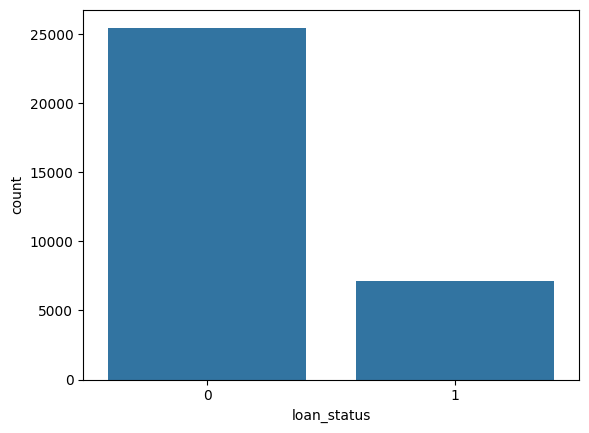

In [72]:
sns.countplot(x=base_credit['loan_status']);

(array([2.693e+04, 4.891e+03, 6.510e+02, 8.900e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

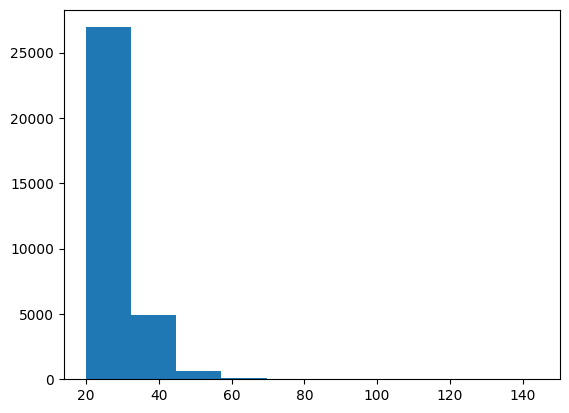

In [73]:
plt.hist(x=base_credit['person_age'])

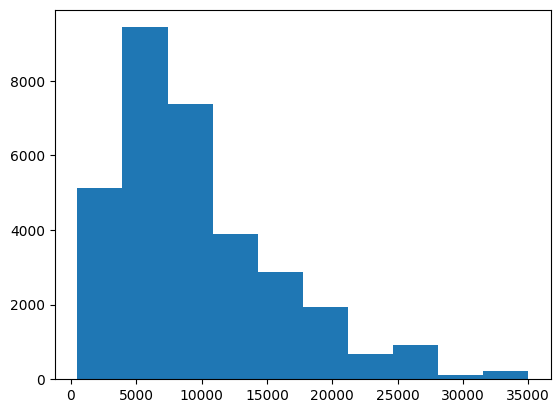

In [74]:
# Distribuição das dividas
plt.hist(base_credit['loan_amnt']);

# Tratamentos de valores inconsistentes

Só para lembrar, aqui são apenas alguns exemplos, em modelos futuros podem ter outros tipos de infromações que precisam desses tratamentos (Ou algo parecido)

In [75]:
# Tratamento para verificar se tem pessoas com idades negativas
base_credit.loc[base_credit['person_age'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [77]:
# No caso acima, foi feito um código para remover idades negativas, mas na base que estou usando não tem
# mas e tivesse, a melhor forma de tratar isso, seria pegar a média das idades, e colocar no lugar das idades negativas
# mas para fazer isso, teria que remover as idades negativas, pois elas influenciam no calculo

# base_credit.mean()

# media_idade = base_credit = base_credit.loc[base_credit['person_age'] > 0].mean()
# base_credit.loc[base_credit['person_age'] < 0] = media_idade

0        22
1        21
2        25
3        23
4        24
         ..
32576    57
32577    54
32578    65
32579    56
32580    66
Name: person_age, Length: 32581, dtype: int64

# Tratamento de valores faltantes

In [78]:
# O código abaixo retorna True, se tiver um valor faltante na base
# Como eu coloquei o .sum(), agora ele vai retornar a quantidade de valores faltantes

base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [79]:
# Inseri a média dos valores no lugar dos valores nulos

base_credit.fillna(base_credit.loc[:, 'person_emp_length'].mean(), inplace=True)
base_credit.fillna(base_credit.loc[:, 'loan_int_rate'].mean(), inplace=True)

In [80]:
base_credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

# Divisão entre previsores e classe

In [ ]:
# Aqui eu separei as informações de treino por categoricas, pois vou aplicar a padronização
# nas variaveis numericas

X_credit = base_credit[["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]].values

In [97]:
y_credit = base_credit.iloc[:, 4].values

# Escalonamento dos valores

É uma boa prática ver os valores minimos e maximos das colunas, para isso usar as funções min e max. Geralmente quando se tem uma diferença muito grande entre os valores minimos, é recomendavel aplicar uma normalização, para que os valores fiquem na mesma escala.

Existem dois tipos de normalização, sendo eles: Padronização (Standardisation) e Normalização (Normalization). Onde geralmente o metodo da Padronização é mais recomendado para casos onde existam Outliers na base

In [104]:
# X_credit[:, 0].max(), X_credit[:, 1].max()

In [105]:
base_padroniza = base_credit[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]

In [106]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit_padroniza = scaler_credit.fit_transform(base_padroniza)

In [107]:
X_credit_padroniza

array([[-0.90337383, -0.11414329, 28.93573761, ...,  1.56348074,
         3.9314108 , -0.69155444],
       [-1.06090423, -0.91114671,  0.05148097, ...,  0.20183814,
        -0.65745847, -0.93816728],
       [-0.43078263, -0.91114671, -0.92764637, ...,  0.6845516 ,
         3.74411001, -0.69155444],
       ...,
       [ 5.87043346,  0.16012914, -0.4380827 , ...,  0.15998437,
         2.71395568,  5.47376651],
       [ 4.45265984,  1.35402091,  0.05148097, ...,  0.29670668,
        -0.65745847,  4.98054084],
       [ 6.02796387, -0.38841572, -0.68286453, ..., -0.11904075,
        -0.1892065 ,  5.96699219]])

In [108]:
X_credit = np.concatenate([X_credit, X_credit_padroniza], axis=1)

Só para explicar, eu tive que separar as informações categoricas das numericas, antes de aplicar a padronização, e como as informações foram convertidas para uma matriz numpy, eu apenas concatenei as duas matrizes por coluna, já que a ordem das colunas não influenciam no treinamento do modelo (desde que ja tenham sido tratadas e a coluna objetivo já tenha sido armazenada em y)

In [109]:
print(X_credit[0])

['RENT' 'PERSONAL' 'D' 'Y' -0.9033738320142709 -0.11414328837658246
 28.93573760687662 4.019403764559302 1.563480741257186 3.9314107955904056
 -0.6915544446924091 -0.9033738320142709 -0.11414328837658246
 28.93573760687662 4.019403764559302 1.563480741257186 3.9314107955904056
 -0.6915544446924091]


One-Hotting-Encoding

Aqui seria o proximo passo, ja que a base possui informações cateogoricas, mas como estou seguindo um curso, vou deixar essa tecnica para o proximo notebook que vou criar. 

Explicando:
Quando se treina modelos (Como por exemplo com XGBoost), eles não aceitam dados categoricos, então deve-se transforma-los em algo numerico, mas se só criar para cada tipo de dado categorico deixando eles com uma numeração em sequencia, isso pode fazer com que o modelo entenda que quem tem uma numeração maior seja mais importante, o que muitas vezes não é, então deve-se aplicar a tecnica citada, onde ela faz algo paracido com o exemplo a seguir:

A B C
1 0 0
0 1 0
0 0 1

Ele deixa ligado para o tipo e os outros desligados